<a href="https://www.kaggle.com/code/zarebj/bank-transaction-analysis-proj?scriptVersionId=237137024" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Bank Transaction Analysis Proj.

For this Project I Generated a random set of financial transactions using Chat Gpt, asking it to keep it raw similar to how banks usually give them out. Upon doing so I Utilized Excel Power Query Editor to clean and format the Data. after cleaning the Data, I now had a 120 row set of Data ready to be processed. This data was uploaded to kaggle for Data Analyis and Visualization.

My Goal for this Analysis was to see, how much money did this user spend per month, and in what month did they spend the most.

This was visualized on a Column chart and the month of highest expensed was enouunced.
In addition to this I wanted to separate the complete year's spending by category, seeing how much did he spend in each category.

This was visualized on a Color Coded Donut chart, with Color and CAtegory Guide. (the amount of money spent per category was not shown, instead the percentage of the total that pertains to each category is shown.)
In summary the goals I had for this project were fufilled, However this can be drastically optimized with more analizations based on this same data, More Acurate and User-Friendly Charts, Predictive Analizations and AI, and so much more. I plan on returning to this project and optimizing it, as I gain more knowledge and experience in the Data Analytics environment.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import IPython.core.display as di
import os 





file_path = "/kaggle/input/banktransaction-data-3-0/BankTransaction_Data.csv"
data = pd.read_csv(file_path)

In [2]:
def scrollable_dataframe(df, height=400):
    html = f'''
    <div style="overflow:auto; height:{height}px; border:1px solid #ccc; padding:5px;">
        {df.to_html(classes="table table-striped", escape=False)}
    </div>
    '''
    display(HTML(html))
    
scrollable_dataframe(data, height=500) 

,Date,Description,Account,Groceries,Category Details,Amount
0,1-Jan-24,Direct Deposit: XYZ Corporation,Zareb Banking - 0565,Income: Paychecks/Salary,Income: Paychecks/Salary,1500.00
1,1-Jan-24,Transfer to Savings,Zareb Banking - 0565,Savings Transfer,Savings Transfer,-600.00
2,3-Jan-24,Walmart Superstore,Zareb Banking - 0565,Groceries,Groceries: Groceries,-75.40
3,4-Jan-24,Starbucks Coffee,Zareb Banking - 0565,Restaurants & Dining,Restaurants & Dining: Coffee Shops,-4.75
4,5-Jan-24,Amazon Purchase: Office Supplies,Zareb Banking - 0565,Shopping & Entertainment,Shopping & Entertainment: General Merchandise,-29.99
5,6-Jan-24,Gas Station: Shell Fuel,Zareb Banking - 0565,Auto & Transport,Auto & Transport: Fuel,-45.00
6,8-Jan-24,Rent Payment,Zareb Banking - 0565,Home & Utilities,Home & Utilities: Rent,-1200.00
7,9-Jan-24,Transfer from Savings,Zareb Banking - 0565,Savings Transfer,Savings Transfer,500.00
8,10-Jan-24,Uber Ride,Zareb Banking - 0565,Auto & Transport,Auto & Transport: Rideshare,-15.80
9,12-Jan-24,Netflix Subscription,Zareb Banking - 0565,Shopping & Entertainment,Shopping & Entertainment: Streaming Services,-15.99


In [3]:
data['date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
data['month'] = data['date'].dt.to_period('M')

data_spending = data[data['Amount'] < 0]  

monthly_spending = data_spending.groupby('month')['Amount'].sum().reset_index()
monthly_spending['month'] = monthly_spending['month'].astype(str)
monthly_spending['amount'] = monthly_spending['Amount'].abs()


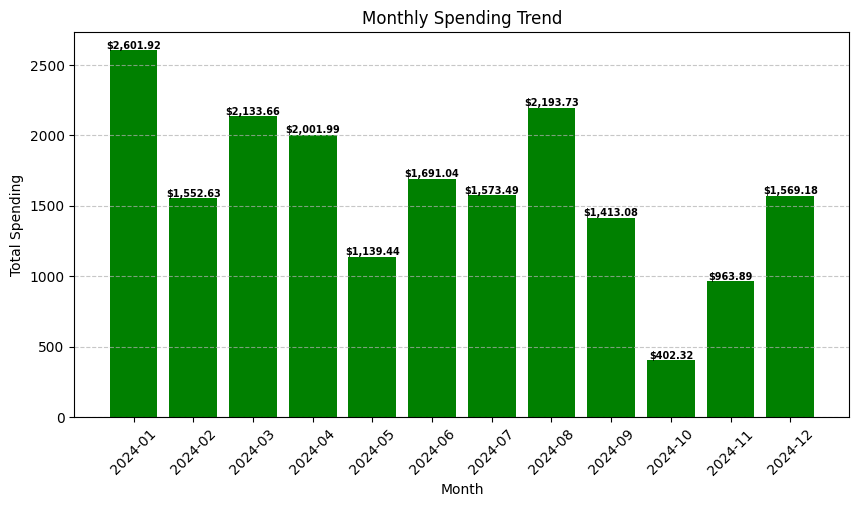

📌 *Average Monthly Spending:* $1,603.03
🔥 *Highest Spending Month:* January ($2,601.92)


In [4]:
plt.figure(figsize=(10, 5))
bars = plt.bar(monthly_spending['month'], monthly_spending['amount'], color='green')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"${height:,.2f}", 
             ha='center', va='bottom', fontsize=7, fontweight='bold', color='black')

plt.xlabel("Month")
plt.ylabel("Total Spending")
plt.title("Monthly Spending Trend")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

average_monthly_spending = monthly_spending['amount'].mean()
highest_monthly_spending = monthly_spending['amount'].max()
highest_spending_month = monthly_spending.loc[monthly_spending['amount'].idxmax(), 'month']
plt.show()

average_monthly_spending = monthly_spending['amount'].mean()
highest_monthly_spending = monthly_spending['amount'].max()
highest_spending_month = monthly_spending.loc[monthly_spending['amount'].idxmax(), 'month']

MonthDict = {
    "2024-01": "January",
    "2024-02": "Febuary",
    "2024-03": "March",
    "2024-04": "April",
    "2024-05": "May"}


print(f"📌 *Average Monthly Spending:* ${average_monthly_spending:,.2f}")
print(f"🔥 *Highest Spending Month:* {MonthDict[highest_spending_month]} (${highest_monthly_spending:,.2f})")

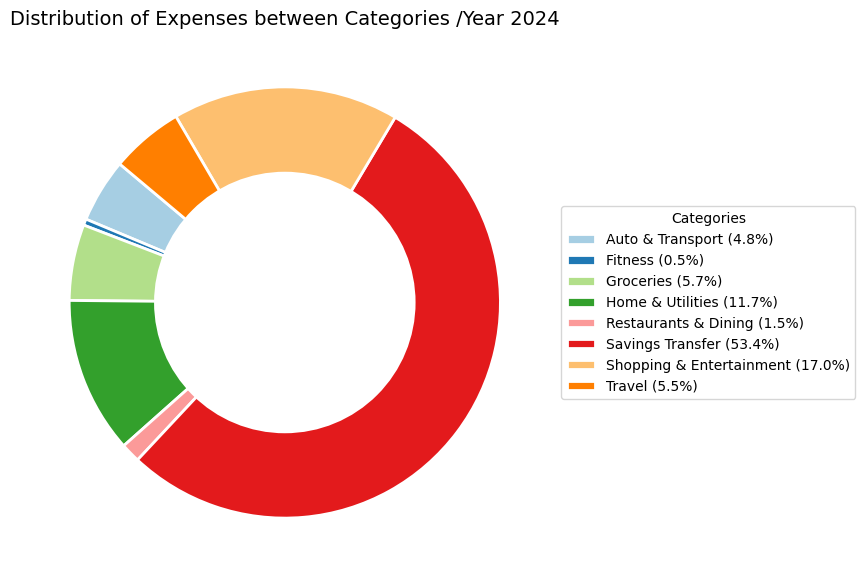

In [5]:
data_spending = data[data['Amount'] < 0]
expense_categories = data_spending.groupby('Groceries')['Amount'].sum().abs()


# Convert amounts to absolute values
total_expense = expense_categories.abs().sum()
percentages = (expense_categories.abs() / total_expense) * 100

colors = plt.cm.Paired.colors  

# Create the Donut Chart
plt.figure(figsize=(10, 7))
wedges, _ = plt.pie(
    expense_categories.abs(), 
    labels=None,  # Remove direct labels from the chart
    startangle=140, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}, 
    colors=colors
)

# Create a white circle in the center for the donut effect
centre_circle = plt.Circle((0,0),0.60,fc='white', edgecolor='white', linewidth=2)
plt.gca().add_artist(centre_circle)

category_labels = [f"{cat} ({pct:.1f}%)" for cat, pct in zip(expense_categories.index, percentages)]

plt.legend(wedges, category_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Distribution of Expenses between Categories /Year 2024", fontsize=14)
plt.show()